# 🏀 NBA Team Points Prediction Model
🙋 **authors**: szymond44, gwiazdan  
📆 **date**: 21-07-2025  


In [60]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
%matplotlib inline

In [42]:
%load_ext autoreload
%autoreload 2
from data.api_fetcher import ApiFetcher

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ✨ Introduction

-- todo --


## Sandbox
-- na razie do testowania api --

In [43]:
%reload_ext autoreload
api = ApiFetcher()


In [44]:
columns = list(api.data.columns)
columns_to_drop = ['game_id', 'home_video_available', 'away_video_available']
numeric_columns = api.data.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in columns_to_drop:
    if col in numeric_columns:
        numeric_columns.remove(col)


<Axes: >

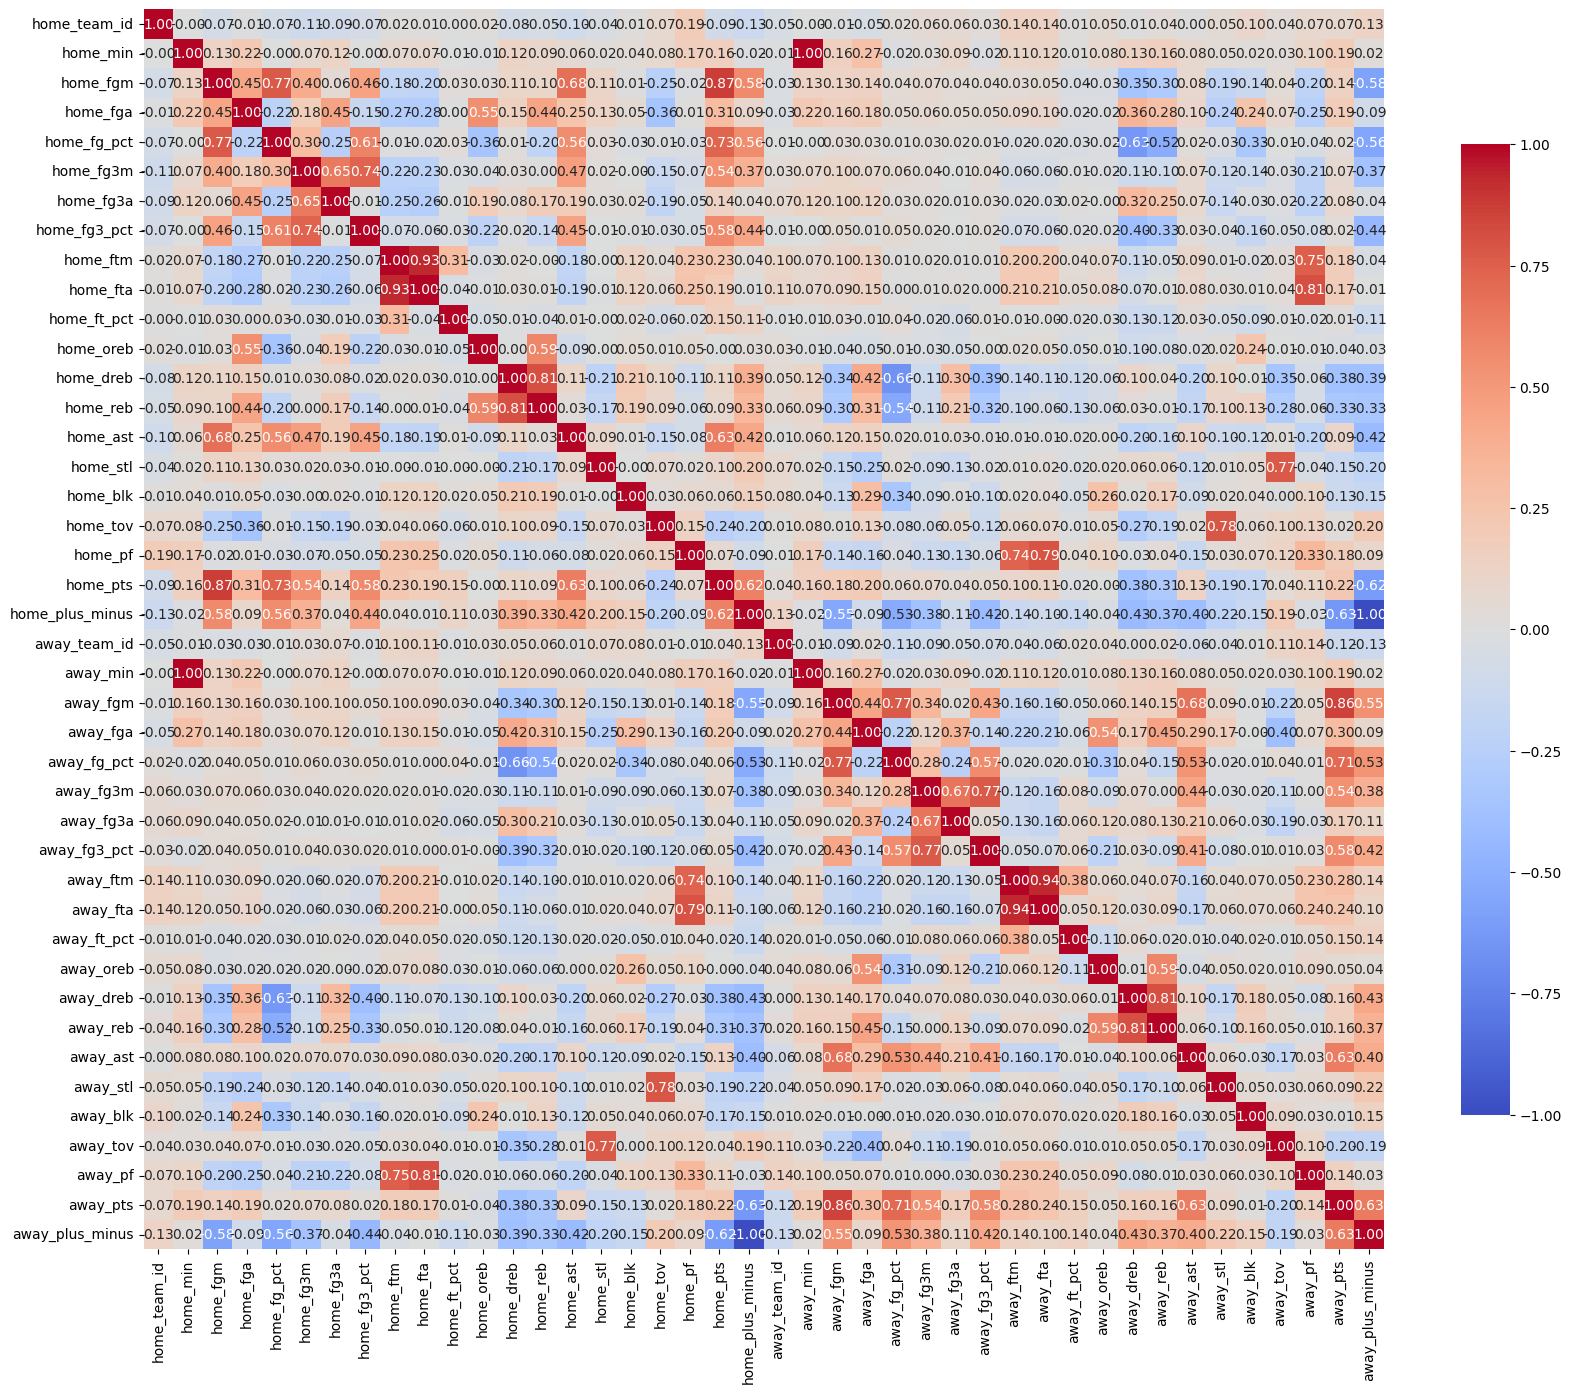

In [53]:
plt.figure(figsize=(20, 18))
correlation_matrix = api.data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})

komentarz:
korelacja $|x|\in \langle 0.8, 1 \rangle$ jest bardzo silna i można ją pominąć. Mamy dwa wyjścia

- Można usunąć jedną z cech
- Możemy spróbować Analizy głównych składowych

In [62]:
threshold = 0.8
matrix = abs(correlation_matrix) >= threshold
close_features = set()
close_features = set()
for i in range(len(matrix.columns)):
    for j in range(len(matrix)):
        if i != j and matrix.iloc[i, j]:
            topple = tuple(sorted([matrix.columns[i], matrix.index[j]]))
            close_features.add(topple)

close_features = list(close_features)  # Convert back to list if needed
            topple = tuple(sorted([matrix.columns[i], matrix.index[j]]))
            close_features.add(topple)

close_features = list(close_features)  # Convert back to list if needed



In [63]:
print(pd.Series(close_features))

0                  (away_min, home_min)
1                 (home_dreb, home_reb)
2                 (away_dreb, away_reb)
3                  (home_fgm, home_pts)
4                  (away_fgm, away_pts)
5                  (away_fta, away_ftm)
6                   (away_pf, home_fta)
7    (away_plus_minus, home_plus_minus)
8                  (home_fta, home_ftm)
dtype: object
